In [ ]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive/My Drive/Colab Notebooks/ProgettoDRV

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/ProgettoDRV


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/covid.csv')
# Converte la data
data['date'] = pd.to_datetime(data["date"])
# Select a subset of dataset's rows (select only total world data)
world_data = data[data["iso_code"] == "OWID_WRL"]
# Set date as index of the dataset
world_data = world_data.set_index(['date'])
wd = world_data[["new_cases", "new_deaths", "new_vaccinations"]]

In [ ]:
#data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168385 entries, 0 to 168384
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    168385 non-null  object 
 1   continent                                   158312 non-null  object 
 2   location                                    168385 non-null  object 
 3   date                                        168385 non-null  object 
 4   total_cases                                 165345 non-null  float64
 5   new_cases                                   165194 non-null  float64
 6   new_cases_smoothed                          163203 non-null  float64
 7   total_deaths                                147425 non-null  float64
 8   new_deaths                                  147456 non-null  float64
 9   new_deaths_smoothed                         145339 non-null  float64
 

In [ ]:
wd = wd.asfreq("W", method="ffill")

wd= (wd - wd.min()) / (wd.max() - wd.min())

In [ ]:
import plotly.graph_objects as go

import pandas as pd


# Create figure
fig = go.Figure()


fig.add_trace(
    go.Scatter(x=list(wd.index), y=list(wd.new_cases), name = "Nuovi casi"))

fig.add_trace(
    go.Scatter(x=list(wd.index), y=list(wd.new_deaths), name = "Nuove morti"))

fig.add_trace(
    go.Scatter(x=list(wd.index), y=list(wd.new_vaccinations), name = "Nuove vaccinazioni"))


# Set title
fig.update_layout(
    #barmode = "relative",
    title_text="Bund interest"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        #fixedrange = True,
        range= ["2020-01-01", "2022-03-01"],
        #gridcolor = "pink",
        rangeselector=dict(
            # Colore dei bottoni quando ci passi sopra con mosue
            #activecolor = "red",
            # Colore dei bottoni
            #bgcolor = "yellow",
            #Posizione dei bottoni sull'asse x (valori tra -2 e 3)
            x = 0.5,
            buttons=list([
                dict(count=1,
                     label="1 month",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6 months",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1 year",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()
fig.write_html("prova.html")

In [ ]:
wdpct.isnull().sum()
np.isinf(wdpct).any()
wdpct.replace([np.inf, -np.inf], 0 , inplace=True)

In [ ]:
wd.new_vaccinations.fillna(0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
wdpct = wd.pct_change().dropna()

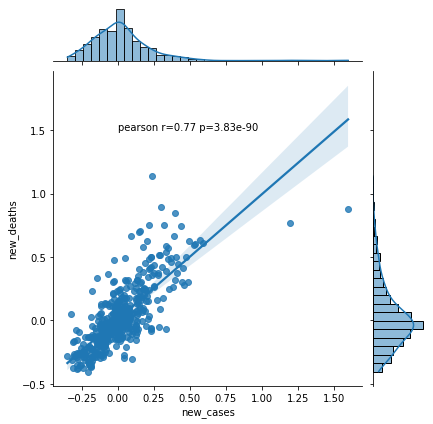

In [ ]:
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

g = sns.jointplot(x='new_cases', y='new_deaths', data=wdpct, kind='reg');

r,p = pearsonr(wdpct['new_cases'], wdpct['new_deaths'])
g.ax_joint.text(x=0.0,y=1.5,s="pearson r={:.2f} p={:.2e}".format(r,p));

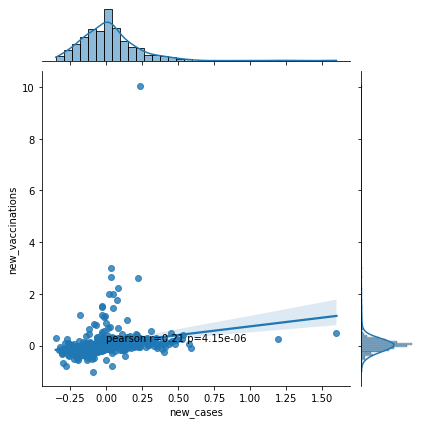

In [ ]:
g = sns.jointplot(x='new_cases', y='new_vaccinations', data=wdpct, kind='reg');

r,p = pearsonr(wdpct['new_cases'], wdpct['new_vaccinations'])
g.ax_joint.text(x=0.0,y=0.175,s="pearson r={:.2f} p={:.2e}".format(r,p));

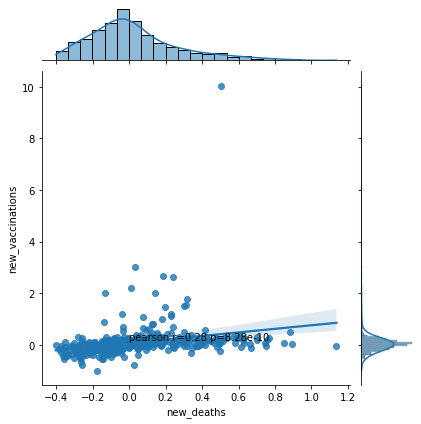

In [ ]:
g = sns.jointplot(x='new_deaths', y='new_vaccinations', data=wdpct, kind='reg');

r,p = pearsonr(wdpct['new_deaths'], wdpct['new_vaccinations'])
g.ax_joint.text(x=0.0,y=0.175,s="pearson r={:.2f} p={:.2e}".format(r,p));